In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#reshaping y_train from 2D to 1D

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird","cat", "deer", "dog", "frog", "horse","ship","truck"]

In [ ]:
classes[8]

'ship'

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

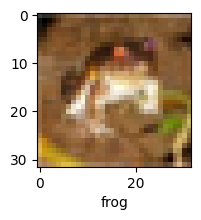

In [ ]:
plot_sample(X_train, y_train, 0)

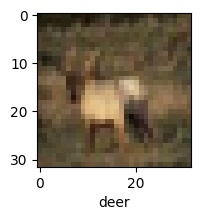

In [ ]:
plot_sample(X_train, y_train, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
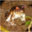

In [ ]:
X_train[0]

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
cnn_model = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
cnn_model.compile(optimizer='adam',
                  loss= 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.1569 - accuracy: 0.2578
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.4775 - accuracy: 0.4552
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2614 - accuracy: 0.5453
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1427 - accuracy: 0.5904
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0631 - accuracy: 0.6227
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9996 - accuracy: 0.6475
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9471 - accuracy: 0.6669
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9105 - accuracy: 0.6812
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8677 - accuracy: 0.6941
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0552 - accuracy: 0.6441


[1.0552494525909424, 0.64410001039505]

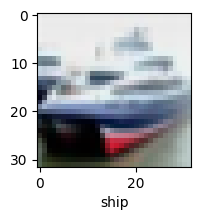

In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.1542627e-03, 1.3436953e-04, 4.2136745e-03, 6.8346828e-01,
        1.3840543e-02, 2.0616676e-01, 4.6377856e-02, 2.4366372e-03,
        3.7921082e-02, 4.2865779e-03],
       [4.4306973e-03, 1.8369775e-02, 4.8367980e-07, 2.6824324e-07,
        9.6738415e-07, 1.5044080e-09, 3.8636201e-05, 1.1754668e-08,
        9.7028267e-01, 6.8764966e-03],
       [2.8518409e-01, 1.9703548e-01, 1.1262094e-02, 1.6022960e-02,
        2.8874930e-02, 2.0867090e-03, 1.8457567e-02, 4.3020952e-03,
        3.4337261e-01, 9.3401439e-02],
       [6.9462579e-01, 6.5021100e-05, 2.7738644e-02, 5.5903341e-03,
        6.7665659e-02, 1.0543368e-03, 1.0124056e-03, 2.0904127e-04,
        2.0105673e-01, 9.8200422e-04],
       [6.8834939e-05, 1.4505013e-06, 9.0222899e-03, 4.9066093e-02,
        1.2788387e-01, 7.2824587e-03, 8.0607402e-01, 5.8349781e-04,
        8.2855859e-06, 9.2636856e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Classification Report: ', classification_report(y_test, y_classes))


Classification Report:                precision    recall  f1-score   support

           0       0.75      0.63      0.68      1000
           1       0.81      0.74      0.78      1000
           2       0.55      0.49      0.52      1000
           3       0.43      0.51      0.47      1000
           4       0.48      0.69      0.57      1000
           5       0.56      0.55      0.55      1000
           6       0.72      0.70      0.71      1000
           7       0.75      0.63      0.69      1000
           8       0.76      0.79      0.77      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.65     10000
weighted avg       0.66      0.64      0.65     10000

